In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from collections import defaultdict
import scipy.stats as st
import pickle

import networkx as nx
# import gmatch4py as gm

import sys
sys.path.append("..\\Git\\complex_stylized_supply_chain_model_generator")

from complex_toy_model_graph_generator import ComplexSimModelGraph
from structure_model_composer.set_locations_of_structures import plot_graph_locations_with_pos


In [2]:
data={}
x={}
y={}

In [3]:
#Open data
with open(r"./bo_0/final_bo_0_all_seeds.pkl", "rb") as f:
    data = pickle.load(f)

In [4]:
for seed, dict_seed in data.items():
    for perc, res in dict_seed.items():
        method_name = perc.split("_")[0]
        try:
            percentage = x[method_name]
            performance = y[method_name]
        except KeyError:
            percentage = x[method_name] = []
            performance = y[method_name] = defaultdict(list)
        current_percentage = int(perc.split("_")[-1])
        percentage.append(current_percentage)
        performance[current_percentage].append(res["Quality_of_Fit"]["graph_edit_distance"])

# Convergence

In [5]:
data[1]["bo_0"]["Convergence"].keys()

dict_keys(['n_iterations', 'improvements', 'sum_obj', 'avg_sum_obj'])

In [6]:
len(data[1]["bo_0"]["Convergence"]["n_iterations"])

4351

In [7]:
len(data[1]["bo_0"]["Convergence"]["avg_sum_obj"])

4350

(-70.0, -40.0)

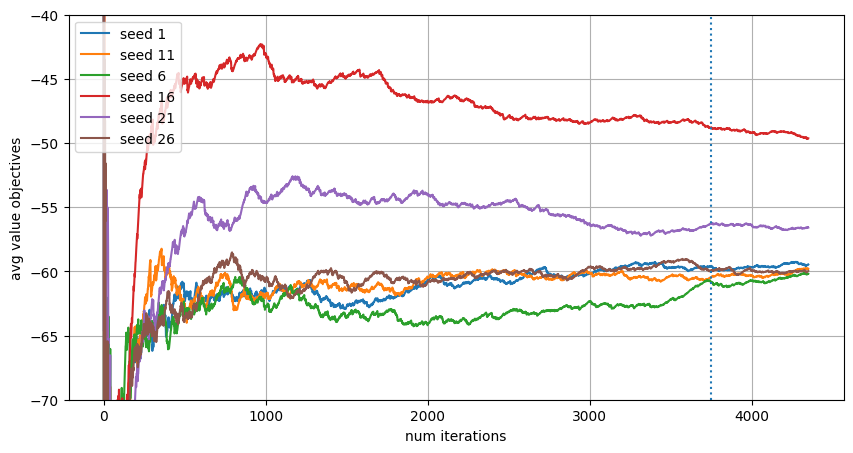

In [23]:
plt.figure(figsize=(10,5))
plt.grid()
for seed, bo in data.items():
    iterations = bo["bo_0"]["Convergence"]["n_iterations"]
    improvements = [0] + bo["bo_0"]["Convergence"]["avg_sum_obj"]
    plt.plot(iterations, improvements, label=f"seed {seed}")

plt.legend()
plt.xlabel("num iterations")
plt.ylabel("avg value objectives")
plt.axvline(x=3750, ls=":")
plt.ylim(-70, -40)